<a href="https://colab.research.google.com/github/yoonputer/Team_Project2/blob/master/Deeplearning/test_dummy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 설치

konlpy

mecab

In [1]:
! ls ./drive/MyDrive/Forkspoon/dummy1.xlsx

./drive/MyDrive/Forkspoon/dummy1.xlsx


In [ ]:
!python -m pip install konlpy

In [ ]:
!curl -O https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh

In [ ]:
!source ./mecab.sh

## 데이터 가져오기

In [52]:
import sqlite3
connect = sqlite3.connect('./drive/MyDrive/Forkspoon/db.sqlite3')

In [58]:
choice = pd.read_sql_query('select * from write_choice',connect)

In [98]:
type(choice)
choice_cols = choice[['점수','질문','답변']]
choice_cols

,점수,질문,답변
0,2.0,입사 지원동기를 작성해주세요. (① 지원 부문을 선택한 이유와 ② 지원 부문과 관련...,"\n경영은 전사의 콘텐츠 제작에서부터 유통 과정을 파악하고, 설정한 목표를 이루기 ..."
1,3.0,"우리 공단에 지원동기와 직무를 선택한 이유, 입사 후 목표와 포부를 기술해 주십시오...","\n""‘재료’를 전공하며 나의 가치를 증명하다""\n 제조업은 우리나라 경제의 주요 ..."
2,2.0,"지원직무를 선택한 이유를(직무와 관련한 경험, 전공, 수강과목, 자격증 등을 포함하...","\n""직접 만든다는 것""\n 실습을 위해 콤부차를 조사하였습니다. 한정된 자료에서 ..."
3,2.0,본인이 선택한 직무에 대해 아래 내용을 포함하여 기술하시오. ①지원한 직무의 역할이...,\n`전지적 참견 시점`\n 영업관리 직무는 BGF리테일의 점포 관리를 위한 매니저...
4,4.0,"본인이 선택한 직무를 담당하고 싶은 이유, 적합성 등에 대해 자유롭게 설명해 보십시...",\n16살에 처음 회계를 접하고 흥미를 느껴 뚜렷한 진로 방향을 형성했습니다.\n기...
...,...,...,...
2992,2.0,화천그룹 및 해당분야 지원동기최소 (30~400),"\n공작기계분야에 있어서 두산인프라코어, 현대위아와 어깨를 나란히 하는 화천기계는 ..."
2993,4.0,지원동기 및 입사 후 포부,"\n(`마트`라는 채널에서 보고 느낀 영업사원들의 모습)\n마트에서 일하면서 판매,..."
2994,4.0,직무 지원동기,"\n<사람을 좋아하는 마음, 경험과 지식을 통해 또 다른 가치를 만들다> \n새로운..."
2995,5.0,LG디스플레이 및 지원 직무에 지원하는 동기에 대해 기술해 주십시오. 성격(장단점)...,\n‘2015 나노 코리아’에서 LG OLED UHD TV를 보고 말을 잃었습니다....


## NLP 

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
x_data = choice_cols['답변']
y_data = choice_cols['점수']

In [66]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data)
x_train.shape, y_train.shape,x_test.shape, y_test.shape

((2247,), (2247,), (750,), (750,))

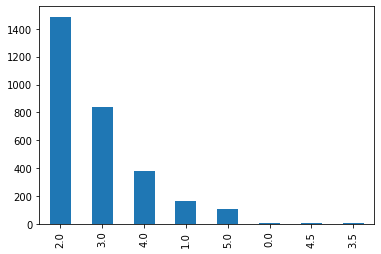

In [69]:
y_data.value_counts().plot(kind='bar')

In [70]:
type(x_train)

pandas.core.series.Series

In [71]:
x_temp = x_train
x_temp= x_temp.str.replace('[^가-힣ㄱ-ㅎ0-9ㅏ-ㅣ]','')
x_temp

593     기업은행이추구하는방향성에공감했습니다스타트업은낭떠러지에서떨어지는것과같다라는말이있습니다...
1615    발전소사고와관련된문제가이슈인최근저는중부발전의보령화력3호기세계최장무고장안적기록달성이라...
491     싱가포르에서찾은나의꿈제가처음산업은행에관심을가지게된계기는고등학교1학년우수신입생으로싱가...
163     어렸을때부터전화번호나차량번호등을보며암산을하는등숫자다루는것을좋아하였고특히아버지께서회계...
468     약1년6개월간교육봉사를진행했습니다나눔의진정한가치를되짚어보게만들어준교육봉사를마친후공공...
                              ...                        
792     나와함께도전하는회사편안함보다는도전하는것을좋아합니다청년봉사단으로서인도의찌든더위속에팀원...
2800    소통의매일유업매일유업은앱솔루트센서티브주부체험단을모집해분유교체를희망하는주부고객과소통하...
702     차별화된전략으로미래를그리는곳도전을통해시장을선도하는롯데와함께성장하고싶습니다보다나은미래...
1611    자원관리의효율성을식스시그마프로젝트를통해배우다저는지속적인성장을위해끝없이고민하고대한민국...
40      맨파워를발휘할수있는직무근무당시3개월동안팔리지않은기름종류제품을앤드매대에진열해재고소진을...
Name: 답변, Length: 2247, dtype: object

## stopwords

```
import pandas as pd

lst_A = ['a','b','c','d', 'e', 1, 2]
df = pd.DataFrame(lst_A)

df.columns=['']

import numpy as np

np.array(df[0].tolist())
```

In [39]:
!ls ./drive/MyDrive/Forkspoon/db.sqlite3

./drive/MyDrive/Forkspoon/db.sqlite3


In [72]:
stopwords = pd.read_sql_query('select * from stopwords',connect)

stopwords.describe()

type(stopwords)

pandas.core.frame.DataFrame

In [73]:
import numpy as np

ko_stopwords_list = np.array(stopwords['words'].tolist())
ko_stopwords_list

array(['이', '있', '하', ..., '잘', '통하', '놓'], dtype='<U4')

## Mecab

In [74]:
from konlpy.tag import Mecab
mecab= Mecab()

In [ ]:
# mecab.pos(x_temp[0])
mecab.morphs(x_temp[0])

In [ ]:
sentance = list ()
 
for tok in x_temp:
  encoded = mecab.morphs(tok)

  sentance.append([item for item in encoded if item not in ko_stopwords_list])

sentance

## Tokenizer

In [139]:
import tensorflow as tf

In [140]:
tokenizer = tf.keras.preprocessing.text.Tokenizer()

In [141]:
tokenizer.fit_on_texts(sentance)

In [ ]:
tokenizer.word_index

In [ ]:
tokenizer.word_counts

In [144]:
total_cnt = len(tokenizer.word_index)

In [145]:
rare_cnt = 0
total_freq,rare_freq = 0,0

for key, value in tokenizer.word_counts.items():
  total_freq = total_freq + value #전체 단어의 수
  if(value <=2):
    rare_cnt = rare_cnt+ 1  
    rare_freq = rare_freq + value #2미만인 단어(희귀단어)의 수

In [146]:
total_cnt, rare_cnt, (rare_cnt/total_cnt)*100, (rare_freq/total_freq)*100

(16361, 8588, 52.490679053847565, 3.6053297593410667)

In [147]:
vocab_size = total_cnt - rare_cnt #보케블러리 사이즈
vocab_size 

7773

In [148]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(vocab_size, oov_token='OOV')

In [149]:
tokenizer.fit_on_texts(sentance)

In [ ]:
tokenizer.index_word

```
{1: 'OOV',
 2: '아쉬운',
 3: '1',
 4: '며',
 5: '통해',
 6: '고객',
 7: '입니다',
 8: '글자',
 9: '합니다',
 ...
 985: '요인',
 986: '관계자',
 987: '배려',
 988: '타이어',
 989: '통합',
 990: '기능사',
 991: '강한',
 992: '직',
 993: '턴',
 994: '반',
 995: '수율',
 996: '인생',
 997: '유도',
 998: '메뉴',
 999: '한계',
 1000: '오프라인',
 ...}

 ```

## To int 


In [151]:
x_train = tokenizer.texts_to_sequences(sentance)

In [152]:
len(x_train[0]),len(x_train[40]),len(x_train[50])

(225, 153, 177)

In [153]:
hist_len = [len(words) for words in x_train]

In [154]:
import matplotlib.pyplot as plt

(array([  6.,   2.,  17.,  51.,  89., 141., 224., 311., 282., 234., 172.,
        156.,  85., 127., 111.,  94.,  57.,  14.,  10.,  11.,  10.,   8.,
          3.,   3.,   3.,   6.,   5.,   1.,   4.,   5.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   2.,   0.,   0.,   0.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([  5.  ,  18.34,  31.68,  45.02,  58.36,  71.7 ,  85.04,  98.38,
        111.72, 125.06, 138.4 , 151.74, 165.08, 178.42, 191.76, 205.1 ,
        218.44, 231.78, 245.12, 258.46, 271.8 , 285.14, 298.48, 311.82,
        325.16, 338.5 , 351.84, 365.18, 378.52, 391.86, 405.2 , 418.54,
        431.88, 445.22, 458.56, 471.9 , 485.24, 498.58, 511.92, 525.26,
        538.6 , 551.94, 565.28, 578.62, 591.96, 605.3 , 618.64, 631.98,
        645.32, 658.66, 672.  ]),
 <a list of 50 Patch objects>)

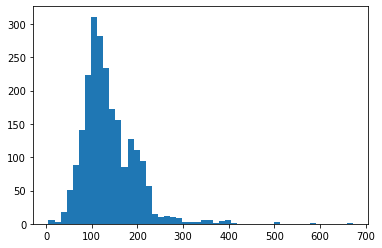

In [155]:
plt.hist(hist_len, bins=50)

- Pad 몇정도 하면 좋을지 여기서 확인

In [156]:
sum(hist_len)/ len(x_train)

136.80729862038274

In [157]:
x_train =tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=300)

In [158]:
x_train

array([[   0,    0,    0, ...,    8, 4174, 6356],
       [   0,    0,    0, ...,    8, 6359, 5363],
       [   0,    0,    0, ...,    8, 4178, 5367],
       ...,
       [   0,    0,    0, ...,    8, 1756, 3057],
       [   0,    0,    0, ...,    8, 2229, 3154],
       [   0,    0,    0, ...,    8, 4833, 5093]], dtype=int32)

In [159]:
len(y_train)

2247

In [133]:
np.unique(y_train)

array([0. , 1. , 2. , 3. , 3.5, 4. , 4.5, 5. ])

In [160]:
type(y_train)

numpy.ndarray

In [161]:
len(x_train), len(y_train)

(2247, 2247)

## Model

In [165]:
model = tf.keras.models.Sequential()

In [167]:
model.add(tf.keras.layers.Embedding(input_dim= vocab_size, output_dim =30 ,input_length=300))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128)))
model.add(tf.keras.layers.Dense(8,activation='softmax'))

model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['acc'])

In [168]:
hist = model.fit(x_train, y_train, epochs=100, batch_size=256, validation_split=0.3, shuffle=True)

Epoch 1/100
7/7 [==============================] - 31s 1s/step - loss: 2.0381 - acc: 0.4230 - val_loss: 1.9444 - val_acc: 0.5348
Epoch 2/100
7/7 [==============================] - 8s 1s/step - loss: 1.8787 - acc: 0.4752 - val_loss: 1.6541 - val_acc: 0.5348
Epoch 3/100
7/7 [==============================] - 8s 1s/step - loss: 1.5619 - acc: 0.4752 - val_loss: 1.2958 - val_acc: 0.5348
Epoch 4/100
7/7 [==============================] - 8s 1s/step - loss: 1.4058 - acc: 0.4752 - val_loss: 1.2681 - val_acc: 0.5348
Epoch 5/100
7/7 [==============================] - 8s 1s/step - loss: 1.3593 - acc: 0.4752 - val_loss: 1.2701 - val_acc: 0.5348
Epoch 6/100
7/7 [==============================] - 8s 1s/step - loss: 1.3274 - acc: 0.4752 - val_loss: 1.2349 - val_acc: 0.5348
Epoch 7/100
7/7 [==============================] - 8s 1s/step - loss: 1.3219 - acc: 0.4752 - val_loss: 1.2421 - val_acc: 0.5348
Epoch 8/100
7/7 [==============================] - 8s 1s/step - loss: 1.3130 - acc: 0.4752 - val_loss: 

## Evaluation


In [169]:
model.evaluate(x_train, y_train) #loss: 1.3036 - acc: 0.4752

71/71 [==============================] - 8s 108ms/step - loss: 1.2825 - acc: 0.4931


[1.2824934720993042, 0.49310192465782166]

## Service

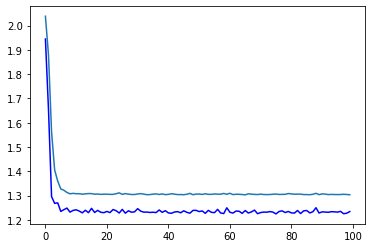

In [170]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'],'b-')
plt.show()

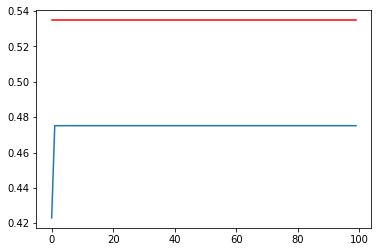

In [172]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'],'r-')
plt.show()